# Análise de Dados - Passagens Aéreas

In [130]:
# Importar biblioteca
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
# Ler o arquivo e criar DataFrame
df = pd.read_excel('201710_EmissaoPassagens_SCDP.xlsx', skiprows=3, skipfooter=3)

In [36]:
df.columns = ['Código do órgão superior', 'Nome do órgão superior', 'Código do órgão solicitante da viagem', 
              'Nome do órgão solicitante da viagem', 'N. PCDP', 'N. Reserva/Localizador', 'Data Emissão Bilhete',
              'Data Embarque', 'Valor Tarifa Comercial', 'Percentual Desconto Aplicado', 'Valor Tarifa Governo',
              'Valor Tarifa Embarque', 'Valor Bilhete', 'Companhia Aérea', 'Classe Tarifária Bilhete', 'Regra Tarifária',
              'No Show', 'Remarcado', 'Cancelado', 'Valor Multas', 'Valor Reembolso', 'Diferença de Tarifa',
              'Situação Final Bilhete']

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50405 entries, 0 to 50404
Data columns (total 23 columns):
Código do órgão superior                 50405 non-null int64
Nome do órgão superior                   50405 non-null object
Código do órgão solicitante da viagem    50405 non-null int64
Nome do órgão solicitante da viagem      50405 non-null object
N. PCDP                                  50405 non-null object
N. Reserva/Localizador                   50405 non-null object
Data Emissão Bilhete                     50405 non-null object
Data Embarque                            50405 non-null object
Valor Tarifa Comercial                   50405 non-null float64
Percentual Desconto Aplicado             50405 non-null float64
Valor Tarifa Governo                     50405 non-null float64
Valor Tarifa Embarque                    50405 non-null float64
Valor Bilhete                            50405 non-null float64
Companhia Aérea                          50405 non-null object
Classe

In [48]:
df.shape

(50405, 23)

In [81]:
df.sample(5)

,Código do órgão superior,Nome do órgão superior,Código do órgão solicitante da viagem,Nome do órgão solicitante da viagem,N. PCDP,N. Reserva/Localizador,Data Emissão Bilhete,Data Embarque,Valor Tarifa Comercial,Percentual Desconto Aplicado,...,Companhia Aérea,Classe Tarifária Bilhete,Regra Tarifária,No Show,Remarcado,Cancelado,Valor Multas,Valor Reembolso,Diferença de Tarifa,Situação Final Bilhete
46422,91842,Instituto Chico Mendes de Conservação da Biod...,92699,Coordenação-Geral de Áreas de Proteção Ambien...,009880/17,IG36TS,2017-10-18 09:20:45.101,2017-11-04 10:55:00,209.9,3.0,...,GOL Linhas Aéreas Inteligentes,N,https://www.voegol.com.br/pt/informacoes/tari...,Não,Não,Não,0.0,0.0,0.0,Voado
37437,2045,Instituto do Patrimônio Histórico e Artístico...,3418,Departamento do Patrimônio Imaterial ...,002625/17,JCC1YZ,2017-10-03 18:09:02.702,2017-11-08 08:10:00,504.9,3.0,...,AZUL LINHAS AÉREAS BRASILEIRA,P,https://www.voeazul.com.br/para-sua-viagem/in...,Não,Não,Não,0.0,0.0,0.0,Andamento
47178,100900,"Instituto Federal de Educação, Ciência e Tecn...",105129,Pró-Reitoria de Pesquisa e Inovação ...,003370/17,QK7K8T,2017-10-18 16:57:36.056,2017-10-27 18:08:00,1104.9,0.0,...,GOL Linhas Aéreas Inteligentes,J,https://www.voegol.com.br/pt/informacoes/tari...,Não,Não,Não,0.0,0.0,0.0,Voado
41595,36687,Agência Nacional de Vigilância Sanitária ...,200495,Gerência-Geral de Inspeção e Fiscalização San...,004787/17,PD6E9L,2017-10-23 11:25:10.127,2017-11-10 16:05:00,360.9,3.0,...,GOL Linhas Aéreas Inteligentes,N,https://www.voegol.com.br/pt/informacoes/tari...,Não,Não,Não,0.0,0.0,0.0,Andamento
46467,91842,Instituto Chico Mendes de Conservação da Biod...,92709,"Coordenação Geral de Criação, Planejamento e ...",010340/17,WG73BH,2017-10-26 10:25:27.643,2017-11-11 08:03:00,436.4,0.0,...,LATAM AIRLINES BRASIL,X,http://t.umail.com.br/ClickHere/ViewEmail.asp...,Não,Não,Não,0.0,0.0,0.0,Andamento


In [44]:
# Identificar as situacoes finais dos bilhetes.
df['Situação Final Bilhete'].unique()

array([' Voado', ' Andamento', ' Cancelado'], dtype=object)

In [59]:
# Identificar as companhias aereas.
df['Companhia Aérea'].unique()

array([' LATAM AIRLINES BRASIL                ',
       ' AVIANCA S.A.                         ',
       ' GOL Linhas Aéreas Inteligentes       ',
       ' AZUL LINHAS AÉREAS BRASILEIRA        ',
       ' Gol OU Latam - Parceria com Terceiro',
       ' MAP TRANSPORTES AEREOS LTDA - MAP    '], dtype=object)

In [65]:
# Distribuicao das situacoes finais dos bilhetes.
df['Situação Final Bilhete'].value_counts()

 Voado        28257
 Andamento    19960
 Cancelado     2188
Name: Situação Final Bilhete, dtype: int64

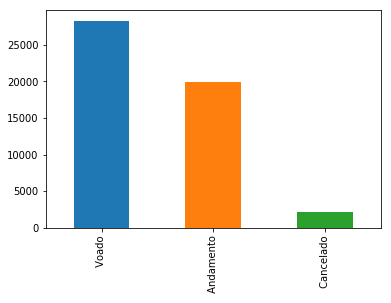

In [101]:
# GRAFICO: Distribuicao das situacoes finais dos bilhetes.
df['Situação Final Bilhete'].value_counts().plot.bar()

In [93]:
# Qual a Companhia com a maior valor de multa?
df[df['Valor Multas'] == df['Valor Multas'].max()]

,Código do órgão superior,Nome do órgão superior,Código do órgão solicitante da viagem,Nome do órgão solicitante da viagem,N. PCDP,N. Reserva/Localizador,Data Emissão Bilhete,Data Embarque,Valor Tarifa Comercial,Percentual Desconto Aplicado,...,Companhia Aérea,Classe Tarifária Bilhete,Regra Tarifária,No Show,Remarcado,Cancelado,Valor Multas,Valor Reembolso,Diferença de Tarifa,Situação Final Bilhete
20931,428,Universidade Federal do Paraná ...,25069,Pró-Reitoria de Pesquisa e Pós-Graduação ...,002970/17,IHTZ7U,2017-10-30 18:46:17.577,2017-11-09 21:05:00,371.9,3.0,...,AZUL LINHAS AÉREAS BRASILEIRA,L,https://www.voeazul.com.br/para-sua-viagem/in...,Não,Sim,Não,210.0,0.0,0.0,Voado


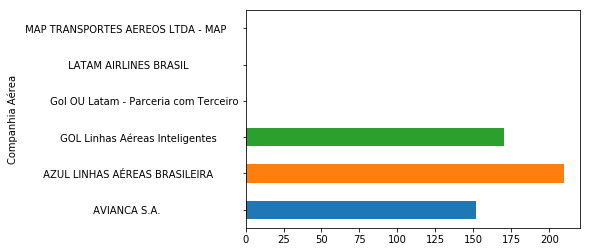

In [180]:
# GRAFICO: Qual a Companhia com a maior valor de multa?
df.groupby('Companhia Aérea')['Valor Multas'].max().plot.barh()

In [182]:
# Qual a Companhia com a maior quantidade de multas?
df.groupby('Companhia Aérea')['Valor Multas'].sum()

Companhia Aérea
 AVIANCA S.A.                              339.24
 AZUL LINHAS AÉREAS BRASILEIRA             210.00
 GOL Linhas Aéreas Inteligentes           1699.90
 Gol OU Latam - Parceria com Terceiro        0.00
 LATAM AIRLINES BRASIL                       0.00
 MAP TRANSPORTES AEREOS LTDA - MAP           0.00
Name: Valor Multas, dtype: float64

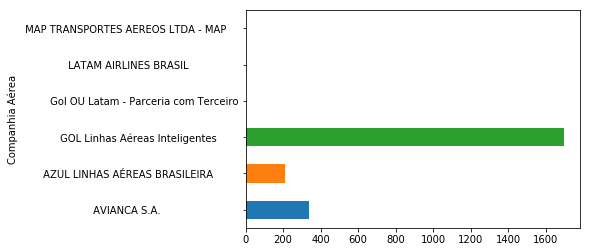

In [181]:
# GRAFICO: Qual a Companhia com a maior quantidade de multas?
df.groupby('Companhia Aérea')['Valor Multas'].sum().plot.barh()

In [175]:
# Qual a Companhia com a maior Valor Tarifa Comercial?
df[df['Valor Tarifa Comercial'] == df['Valor Tarifa Comercial'].max()]

,Código do órgão superior,Nome do órgão superior,Código do órgão solicitante da viagem,Nome do órgão solicitante da viagem,N. PCDP,N. Reserva/Localizador,Data Emissão Bilhete,Data Embarque,Valor Tarifa Comercial,Percentual Desconto Aplicado,...,Companhia Aérea,Classe Tarifária Bilhete,Regra Tarifária,No Show,Remarcado,Cancelado,Valor Multas,Valor Reembolso,Diferença de Tarifa,Situação Final Bilhete
21541,431,Universidade Federal de Santa Maria ...,27563,Pró-Reitoria de Pós-Graduação e Pesquisa ...,004488/17,OBF73Z,2017-10-30 10:00:57.624,2017-11-06 06:10:00,4156.8,3.0,...,AZUL LINHAS AÉREAS BRASILEIRA,"Y,Y,Y/G,G,G",https://www.voeazul.com.br/para-sua-viagem/in...,Não,Não,Não,0.0,0.0,0.0,Voado


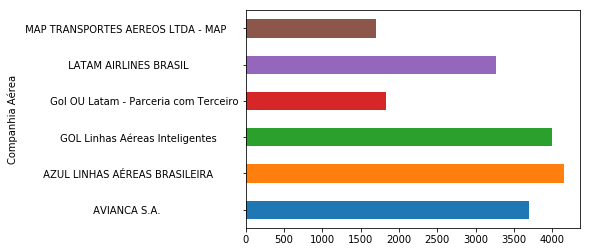

In [176]:
# GRAFICO: # Qual a Companhia com a maior Valor Tarifa Comercial?
df.groupby('Companhia Aérea')['Valor Tarifa Comercial'].max().plot.barh()

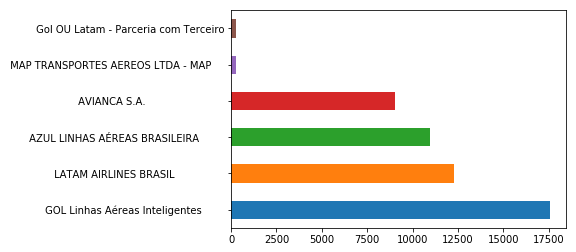

In [179]:
# GRAFICO: Passagens aereas por companhias.
df['Companhia Aérea'].value_counts().plot.barh()

In [171]:
# Qual a Companhia com o maior Valor Tarifa Governo?
df[df['Valor Tarifa Governo'] == df['Valor Tarifa Governo'].max()]

,Código do órgão superior,Nome do órgão superior,Código do órgão solicitante da viagem,Nome do órgão solicitante da viagem,N. PCDP,N. Reserva/Localizador,Data Emissão Bilhete,Data Embarque,Valor Tarifa Comercial,Percentual Desconto Aplicado,...,Companhia Aérea,Classe Tarifária Bilhete,Regra Tarifária,No Show,Remarcado,Cancelado,Valor Multas,Valor Reembolso,Diferença de Tarifa,Situação Final Bilhete
21541,431,Universidade Federal de Santa Maria ...,27563,Pró-Reitoria de Pós-Graduação e Pesquisa ...,004488/17,OBF73Z,2017-10-30 10:00:57.624,2017-11-06 06:10:00,4156.8,3.0,...,AZUL LINHAS AÉREAS BRASILEIRA,"Y,Y,Y/G,G,G",https://www.voeazul.com.br/para-sua-viagem/in...,Não,Não,Não,0.0,0.0,0.0,Voado


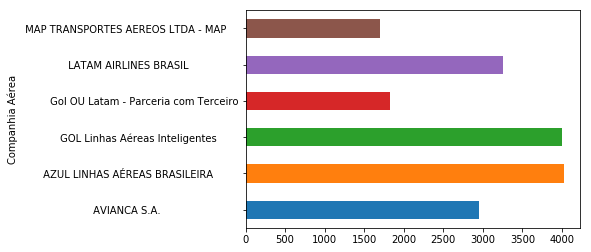

In [172]:
# GRAFICO: Qual a Companhia com o maior Valor Tarifa Governo?
df.groupby('Companhia Aérea')['Valor Tarifa Governo'].max().plot.barh()

In [147]:
# Qual a Companhia com o maior Percentual Desconto Aplicado?
df[df['Percentual Desconto Aplicado'] == df['Percentual Desconto Aplicado'].max()]

,Código do órgão superior,Nome do órgão superior,Código do órgão solicitante da viagem,Nome do órgão solicitante da viagem,N. PCDP,N. Reserva/Localizador,Data Emissão Bilhete,Data Embarque,Valor Tarifa Comercial,Percentual Desconto Aplicado,...,Companhia Aérea,Classe Tarifária Bilhete,Regra Tarifária,No Show,Remarcado,Cancelado,Valor Multas,Valor Reembolso,Diferença de Tarifa,Situação Final Bilhete
16,3,Fundação Instituto Brasileiro de Geografia e ...,6,Diretoria de Informática ...,031005/17,NYAROU,2017-10-19 19:52:48.851,2017-10-22 09:00:00,431.38,100.0,...,LATAM AIRLINES BRASIL,X,http://t.umail.com.br/ClickHere/ViewEmail.asp...,Não,Não,Sim,0.0,0.0,0.0,Cancelado
32474,1929,Ministério da Fazenda ...,3297,Delegacia da Receita Federal do Brasil em For...,035714/17,WC9WT8,2017-10-16 16:56:53.757,2017-10-16 21:07:00,1113.46,100.0,...,LATAM AIRLINES BRASIL,H,http://t.umail.com.br/ClickHere/ViewEmail.asp...,Não,Não,Não,0.0,0.0,0.0,Andamento


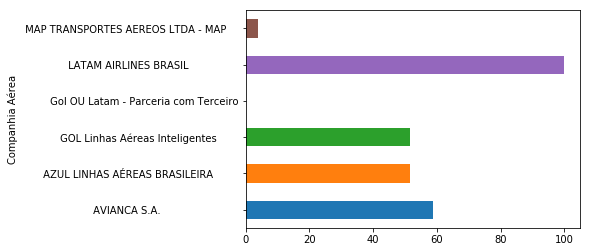

In [174]:
# GRAFICO: Qual a Companhia com o maior Percentual Desconto Aplicado?
df.groupby('Companhia Aérea')['Percentual Desconto Aplicado'].max().plot.barh()